# <center>COVID19 SPAIN </center>
<img src="https://i.pinimg.com/originals/ac/94/54/ac9454aa9d53dcfb691eb5e06109703a.gif">

# Capstone Project - The Battle of the Neighborhoods 
### Applied Data Science Capstone by IBM/Coursera

### The COVID19 pandemic spreads rapidly among the population causing damage, destruction and death.
This document will display the data updated to 07-04-2020 (11:00)
The data in the graphs represent person, human beings, broken families. 
They represent a shocked society that in the case of the deceased, their relatives have not been allowed to be in their last minutes of life. 
To all of them, my most sincere condolences.

# Libraries

In [101]:
# Librerias
import pandas as pd
import os
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy.integrate import odeint
from sklearn.cluster import KMeans
from sklearn import preprocessing
import json
%pylab inline

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import folium
from folium import plugins
from folium.features import DivIcon

!conda install -c conda-forge geopy --yes

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

import plotly
plotly.io.renderers.default = 'colab'

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 


import matplotlib.dates as mdates
from datetime import datetime

from scipy.optimize import curve_fit
from lmfit import Model

from fbprophet import Prophet
import pylab as pl
import scipy.optimize as opt


Populating the interactive namespace from numpy and matplotlib
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



## 1)Situation global (Country )


## Global situation and other countries outside Europe:
Globally, to date, at least 1,356,780 cases and 80,205 deaths have been reported (Table 6). The countries outside Europe that have registered the most cases are the United States (395,011), China (83,249), Iran (64,596), Canada (18,433), Brazil (15,927) and South Korea (10,423) (Table 5, Table 6 and Figure 5). In
The United States, the States that have reported the most cases are New York (138,773), New Jersey (44,416), Michigan (18,970) and Louisiana (16,284).

In [2]:
df_global = pd.read_csv('./data/final_data/dataCOVID19_global.csv')
df_global.dtypes

Territory     object
Diagnose       int64
Deceased       int64
Cured          int64
Población      int64
dtype: object

In [3]:
df_global.isna().sum()

Territory     0
Diagnose      0
Deceased      0
Cured         0
Población     0
dtype: int64

In [4]:
df_global

,Territory,Diagnose,Deceased,Cured,Población
0,Mundo,1561355,95585,345196,7745605430
1,Europa,743957,65880,182871,801000000
2,EEUU,466033,16690,25988,330028000
3,España,157022,15843,55668,47000000
4,Italia,143626,18279,28470,60359546
5,China,83305,3345,77838,1395380000


The expansion of the new SARS-CoV-2 coronavirus, which emerged in the Chinese city of Wuhan in late 2019, is progressing inexorably. Around 1.2 million people in 180 countries around the world have already been diagnosed with Covid-19 and more than 70,000 have lost their lives. But while in the Asian giant the virus shows symptoms of remission, the pandemic strikes Europe and North America with particular virulence: the United States, Spain and Italy are the countries with the most diagnosed cases and the highest death toll.

## 2)CURRENT SITUATION SPAIN

In Spain, to date, 152,446 cases have been registered, 15,238 deaths and 52,165 healed (Table 1 and Figure 1). The Autonomous Communities with the highest cumulative incidence in the last 14 days are La Rioja, Castilla La Mancha, Madrid, and Navarra (Figure 2 and Figure 3). The distribution by age groups of
Hospitalized, ICU and deceased cases are shown in Table 2.

Table 1. COVID-19 cases, cumulative incidence (AI) in the last 14 days, ICU admission and deaths by Autonomous Communities in Spain, 04.09.2020 (consolidated data at 21:00 hours on 08.04.2020).

### Table 1

In [5]:
df_spain = pd.read_csv('./data/final_data/COVID_es_09_04_2020.csv')
df_spain.dtypes

CCAA             object
Date             object
Cases             int64
IA              float64
Hospitalized      int64
UCI               int64
Deceased          int64
Cured             int64
New               int64
dtype: object

In [6]:
df_spain.isna().sum()

CCAA            0
Date            0
Cases           0
IA              0
Hospitalized    0
UCI             0
Deceased        0
Cured           0
New             0
dtype: int64

In [7]:
df_spain

,CCAA,Date,Cases,IA,Hospitalized,UCI,Deceased,Cured,New
0,Andalucía,09.04.2020,9261,69.58,4599,538,652,1193,264
1,Aragón,09.04.2020,3685,194.73,1765,261,385,718,136
2,Asturias,09.04.2020,1737,87.60,1018,94,110,340,32
3,Baleares,09.04.2020,1448,68.55,751,132,89,696,36
4,Canarias,09.04.2020,1834,48.76,730,140,92,359,72
5,Cantabria,09.04.2020,1619,163.15,720,71,98,214,47
6,CastillaLaMancha,09.04.2020,12489,447.94,2575,342,1322,1766,701
7,CastillayLeón,09.04.2020,10518,292.97,5523,338,1082,3242,460
8,Cataluña,09.04.2020,31043,253.43,20943,2507,3148,13063,1396
9,Ceuta,09.04.2020,84,87.29,9,4,4,7,0


AI (14 d.): Accumulated incidence (cases accumulated per 100,000 inhabitants) in the last 14 days.
The data of the CCAA are under continuous review and certain daily fluctuations may be due to data
cleaning processes and not to real variations that occur from one day to the next.

*The confirmed cases do not come from the sum of hospitalized, cured and deceased patients, since they are not exclusive.
Deceased and cured patients may have required hospitalization and therefore compute in both groups. 
Patients who have required ICU also compute in patients who have required hospitalization.

¥The data for these communities are prevalence data (people entered as of today). 
They do not reflect the total number of people who have been hospitalized or admitted to the ICU throughout the 
reporting period, so the sum of all the people who have required hospitalization or admission to the ICU in Spain cannot be made. 
Source: self made

### Table 2

In [8]:
df_table2 = pd.read_csv('./data/final_data/table2_distribution.csv')
df_table2
df_table2.dtypes

grupo_edad      object
Cases            int64
Hospitalized     int64
%               object
UCI              int64
%.1             object
Deceased         int64
%.2             object
dtype: object

In [9]:
df_table2.isna().sum()

grupo_edad      0
Cases           0
Hospitalized    0
%               0
UCI             0
%.1             0
Deceased        0
%.2             0
dtype: int64

In [144]:
df_table2

,grupo_edad,Cases,Hospitalized,%,UCI,%.1,Deceased,%.2
0,0-9,285,87,"0,20 %",7,"0,20 %",1,"0,00 %"
1,10-19,588,118,"0,20 %",5,"0,10 %",1,"0,00 %"
2,20-29,5381,828,"1,60 %",53,"1,20 %",11,"0,20 %"
3,30-39,10341,2204,"4,30 %",160,"3,50 %",24,"0,40 %"
4,40-49,16088,4964,"9,70 %",402,"8,80 %",61,"0,90 %"
5,50-59,19836,8006,"15,60 %",877,"19,10 %",197,"2,90 %"
6,60-69,17713,10377,"20,30 %",1456,"31,80 %",597,"8,90 %"
7,70-79,16957,12588,"24,60 %",1457,"31,80 %",1773,"26,30 %"
8,80-89,14218,9523,"18,60 %",150,"3,30 %",2864,"42,60 %"
9,90 y +,5040,2527,"4,90 %",17,"0,40 %",1200,"17,80 %"


### <b>AI</b> (14 d.): Accumulated incidence (cases accumulated per 100,000 inhabitants) in the last 14 days. 
### The data of the CCAA are under continuous review and certain daily fluctuations may be due to data cleaning processes and not to real variations that occur from one day to the next.

In [48]:
# Coordinates of Spain Communite Autonomus CCAA
Spain_coord = pd.read_csv("./data/final_data/ccaa_coordenadas.csv")


dbd_Andalucia = pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Andalucia")
dbd_Aragon = pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Aragon")
dbd_Asturias = pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Asturias")
dbd_Baleares = pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Baleares")
dbd_CValenciana= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="CValenciana")
dbd_Canarias= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Canarias")
dbd_Cantabria= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Cantabria")
dbd_CastillaLaMacha= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="CastillaLaMacha")
dbd_CastillayLeón= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="CastillayLeón")
dbd_Cataluña= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Cataluña")
dbd_Ceuta= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Ceuta")
dbd_Extremadura= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Extremadura")
dbd_Galicia= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Galicia")
dbd_Madrid= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Madrid")
dbd_Melilla= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Melilla")
dbd_Murcia= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Murcia")
dbd_Navarra= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="Navarra")
dbd_PaísVasco= pd.read_excel('./data/final_data/per_day_cases.xlsx',parse_dates=True, sheet_name="PaísVasco")


Spain_coord.dtypes

CCAA         object
Latitude     object
Longitude    object
dtype: object

# 2.1)Comparative CCAA "Cases confirmed"

In [23]:
# Comparative CCAA "Cases confirmed"
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Andalucia['Date'], y = dbd_Andalucia['Cases'], mode='lines+markers',name='Andalucia'))
fig.add_trace(go.Scatter(x=dbd_Aragon['Date'], y = dbd_Aragon['Cases'], mode='lines+markers',name='Aragon'))
fig.add_trace(go.Scatter(x=dbd_Asturias['Date'], y = dbd_Asturias['Cases'], mode='lines+markers',name='Asturias'))
fig.add_trace(go.Scatter(x=dbd_Baleares['Date'], y = dbd_Baleares['Cases'], mode='lines+markers',name='Baleares'))
fig.add_trace(go.Scatter(x=dbd_CValenciana['Date'], y = dbd_CValenciana['Cases'], mode='lines+markers',name='CValenciana'))
fig.add_trace(go.Scatter(x=dbd_Canarias['Date'], y = dbd_Canarias['Cases'], mode='lines+markers',name='Canarias'))
fig.add_trace(go.Scatter(x=dbd_Cantabria['Date'], y = dbd_Cantabria['Cases'], mode='lines+markers',name='Cantabria'))
fig.add_trace(go.Scatter(x=dbd_CastillaLaMacha['Date'], y = dbd_CastillaLaMacha['Cases'], mode='lines+markers',name='CastillaLaMacha'))
fig.add_trace(go.Scatter(x=dbd_CastillayLeón['Date'], y = dbd_CastillayLeón['Cases'], mode='lines+markers',name='CastillayLeón'))
fig.add_trace(go.Scatter(x=dbd_Cataluña['Date'], y = dbd_Cataluña['Cases'], mode='lines+markers',name='Cataluña'))
fig.add_trace(go.Scatter(x=dbd_Ceuta['Date'], y = dbd_Ceuta['Cases'], mode='lines+markers',name='Ceuta'))
fig.add_trace(go.Scatter(x=dbd_Extremadura['Date'], y = dbd_Extremadura['Cases'], mode='lines+markers',name='Extremadura'))
fig.add_trace(go.Scatter(x=dbd_Galicia['Date'], y = dbd_Galicia['Cases'], mode='lines+markers',name='Galicia'))
fig.add_trace(go.Scatter(x=dbd_Madrid['Date'], y = dbd_Madrid['Cases'], mode='lines+markers',name='Madrid'))
fig.add_trace(go.Scatter(x=dbd_Melilla['Date'], y = dbd_Melilla['Cases'], mode='lines+markers',name='Melilla'))
fig.add_trace(go.Scatter(x=dbd_Murcia['Date'], y = dbd_Murcia['Cases'], mode='lines+markers',name='Murcia'))
fig.add_trace(go.Scatter(x=dbd_Navarra['Date'], y = dbd_Navarra['Cases'], mode='lines+markers',name='Navarra'))
fig.add_trace(go.Scatter(x=dbd_PaísVasco['Date'], y = dbd_PaísVasco['Cases'], mode='lines+markers',name='PaísVasco'))

fig.update_layout(title_text='Trend of Coronavirus Cases in Spain (Cumulative cases 9-04-2020)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# 2.2)Comparative CCAA "UCI"

In [24]:
# Comparative CCAA "UCI"
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Andalucia['Date'], y = dbd_Andalucia['UCI'], mode='lines+markers',name='Andalucia'))
fig.add_trace(go.Scatter(x=dbd_Aragon['Date'], y = dbd_Aragon['UCI'], mode='lines+markers',name='Aragon'))
fig.add_trace(go.Scatter(x=dbd_Asturias['Date'], y = dbd_Asturias['UCI'], mode='lines+markers',name='Asturias'))
fig.add_trace(go.Scatter(x=dbd_Baleares['Date'], y = dbd_Baleares['UCI'], mode='lines+markers',name='Baleares'))
fig.add_trace(go.Scatter(x=dbd_CValenciana['Date'], y = dbd_CValenciana['UCI'], mode='lines+markers',name='CValenciana'))
fig.add_trace(go.Scatter(x=dbd_Canarias['Date'], y = dbd_Canarias['UCI'], mode='lines+markers',name='Canarias'))
fig.add_trace(go.Scatter(x=dbd_Cantabria['Date'], y = dbd_Cantabria['UCI'], mode='lines+markers',name='Cantabria'))
fig.add_trace(go.Scatter(x=dbd_CastillaLaMacha['Date'], y = dbd_CastillaLaMacha['UCI'], mode='lines+markers',name='CastillaLaMacha'))
fig.add_trace(go.Scatter(x=dbd_CastillayLeón['Date'], y = dbd_CastillayLeón['UCI'], mode='lines+markers',name='CastillayLeón'))
fig.add_trace(go.Scatter(x=dbd_Cataluña['Date'], y = dbd_Cataluña['UCI'], mode='lines+markers',name='Cataluña'))
fig.add_trace(go.Scatter(x=dbd_Ceuta['Date'], y = dbd_Ceuta['UCI'], mode='lines+markers',name='Ceuta'))
fig.add_trace(go.Scatter(x=dbd_Extremadura['Date'], y = dbd_Extremadura['UCI'], mode='lines+markers',name='Extremadura'))
fig.add_trace(go.Scatter(x=dbd_Galicia['Date'], y = dbd_Galicia['UCI'], mode='lines+markers',name='Galicia'))
fig.add_trace(go.Scatter(x=dbd_Madrid['Date'], y = dbd_Madrid['UCI'], mode='lines+markers',name='Madrid'))
fig.add_trace(go.Scatter(x=dbd_Melilla['Date'], y = dbd_Melilla['UCI'], mode='lines+markers',name='Melilla'))
fig.add_trace(go.Scatter(x=dbd_Murcia['Date'], y = dbd_Murcia['UCI'], mode='lines+markers',name='Murcia'))
fig.add_trace(go.Scatter(x=dbd_Navarra['Date'], y = dbd_Navarra['UCI'], mode='lines+markers',name='Navarra'))
fig.add_trace(go.Scatter(x=dbd_PaísVasco['Date'], y = dbd_PaísVasco['UCI'], mode='lines+markers',name='PaísVasco'))

fig.update_layout(title_text='Trend of Coronavirus Cases UCI(Unity Cuidate Intensive) in Spain (Cumulative cases) 09-04-2200',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# 2.3)Comparative CCAA "Deceased"

In [25]:
# Comparative CCAA "Deceased"
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Andalucia['Date'], y = dbd_Andalucia['Deceased'], mode='lines+markers',name='Andalucia'))
fig.add_trace(go.Scatter(x=dbd_Aragon['Date'], y = dbd_Aragon['Deceased'], mode='lines+markers',name='Aragon'))
fig.add_trace(go.Scatter(x=dbd_Asturias['Date'], y = dbd_Asturias['Deceased'], mode='lines+markers',name='Asturias'))
fig.add_trace(go.Scatter(x=dbd_Baleares['Date'], y = dbd_Baleares['Deceased'], mode='lines+markers',name='Baleares'))
fig.add_trace(go.Scatter(x=dbd_CValenciana['Date'], y = dbd_CValenciana['Deceased'], mode='lines+markers',name='CValenciana'))
fig.add_trace(go.Scatter(x=dbd_Canarias['Date'], y = dbd_Canarias['Deceased'], mode='lines+markers',name='Canarias'))
fig.add_trace(go.Scatter(x=dbd_Cantabria['Date'], y = dbd_Cantabria['Deceased'], mode='lines+markers',name='Cantabria'))
fig.add_trace(go.Scatter(x=dbd_CastillaLaMacha['Date'], y = dbd_CastillaLaMacha['Deceased'], mode='lines+markers',name='CastillaLaMacha'))
fig.add_trace(go.Scatter(x=dbd_CastillayLeón['Date'], y = dbd_CastillayLeón['Deceased'], mode='lines+markers',name='CastillayLeón'))
fig.add_trace(go.Scatter(x=dbd_Cataluña['Date'], y = dbd_Cataluña['Deceased'], mode='lines+markers',name='Cataluña'))
fig.add_trace(go.Scatter(x=dbd_Ceuta['Date'], y = dbd_Ceuta['Deceased'], mode='lines+markers',name='Ceuta'))
fig.add_trace(go.Scatter(x=dbd_Extremadura['Date'], y = dbd_Extremadura['Deceased'], mode='lines+markers',name='Extremadura'))
fig.add_trace(go.Scatter(x=dbd_Galicia['Date'], y = dbd_Galicia['Deceased'], mode='lines+markers',name='Galicia'))
fig.add_trace(go.Scatter(x=dbd_Madrid['Date'], y = dbd_Madrid['Deceased'], mode='lines+markers',name='Madrid'))
fig.add_trace(go.Scatter(x=dbd_Melilla['Date'], y = dbd_Melilla['Deceased'], mode='lines+markers',name='Melilla'))
fig.add_trace(go.Scatter(x=dbd_Murcia['Date'], y = dbd_Murcia['Deceased'], mode='lines+markers',name='Murcia'))
fig.add_trace(go.Scatter(x=dbd_Navarra['Date'], y = dbd_Navarra['Deceased'], mode='lines+markers',name='Navarra'))
fig.add_trace(go.Scatter(x=dbd_PaísVasco['Date'], y = dbd_PaísVasco['Deceased'], mode='lines+markers',name='PaísVasco'))

fig.update_layout(title_text='Trend of Coronavirus Cases in Spain (Cumulative Deceased cases) 09-04-2020',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# 2.4)Comparative CCAA "New Cases"

In [26]:
# Comparative CCAA "New Cases"
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Andalucia['Date'], y = dbd_Andalucia['New Cases'], mode='lines+markers',name='Andalucia'))
fig.add_trace(go.Scatter(x=dbd_Aragon['Date'], y = dbd_Aragon['New Cases'], mode='lines+markers',name='Aragon'))
fig.add_trace(go.Scatter(x=dbd_Asturias['Date'], y = dbd_Asturias['New Cases'], mode='lines+markers',name='Asturias'))
fig.add_trace(go.Scatter(x=dbd_Baleares['Date'], y = dbd_Baleares['New Cases'], mode='lines+markers',name='Baleares'))
fig.add_trace(go.Scatter(x=dbd_CValenciana['Date'], y = dbd_CValenciana['New Cases'], mode='lines+markers',name='CValenciana'))
fig.add_trace(go.Scatter(x=dbd_Canarias['Date'], y = dbd_Canarias['New Cases'], mode='lines+markers',name='Canarias'))
fig.add_trace(go.Scatter(x=dbd_Cantabria['Date'], y = dbd_Cantabria['New Cases'], mode='lines+markers',name='Cantabria'))
fig.add_trace(go.Scatter(x=dbd_CastillaLaMacha['Date'], y = dbd_CastillaLaMacha['New Cases'], mode='lines+markers',name='CastillaLaMacha'))
fig.add_trace(go.Scatter(x=dbd_CastillayLeón['Date'], y = dbd_CastillayLeón['New Cases'], mode='lines+markers',name='CastillayLeón'))
fig.add_trace(go.Scatter(x=dbd_Cataluña['Date'], y = dbd_Cataluña['New Cases'], mode='lines+markers',name='Cataluña'))
fig.add_trace(go.Scatter(x=dbd_Ceuta['Date'], y = dbd_Ceuta['New Cases'], mode='lines+markers',name='Ceuta'))
fig.add_trace(go.Scatter(x=dbd_Extremadura['Date'], y = dbd_Extremadura['New Cases'], mode='lines+markers',name='Extremadura'))
fig.add_trace(go.Scatter(x=dbd_Galicia['Date'], y = dbd_Galicia['New Cases'], mode='lines+markers',name='Galicia'))
fig.add_trace(go.Scatter(x=dbd_Madrid['Date'], y = dbd_Madrid['New Cases'], mode='lines+markers',name='Madrid'))
fig.add_trace(go.Scatter(x=dbd_Melilla['Date'], y = dbd_Melilla['New Cases'], mode='lines+markers',name='Melilla'))
fig.add_trace(go.Scatter(x=dbd_Murcia['Date'], y = dbd_Murcia['New Cases'], mode='lines+markers',name='Murcia'))
fig.add_trace(go.Scatter(x=dbd_Navarra['Date'], y = dbd_Navarra['New Cases'], mode='lines+markers',name='Navarra'))
fig.add_trace(go.Scatter(x=dbd_PaísVasco['Date'], y = dbd_PaísVasco['New Cases'], mode='lines+markers',name='PaísVasco'))

fig.update_layout(title_text='Trend of Coronavirus Cases in Spain (New Cases Cumulative)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# 2.5)Comparative CCAA "Cured"

In [27]:
# Comparative CCAA "Cured"
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Andalucia['Date'], y = dbd_Andalucia['Cured'], mode='lines+markers',name='Andalucia'))
fig.add_trace(go.Scatter(x=dbd_Aragon['Date'], y = dbd_Aragon['Cured'], mode='lines+markers',name='Aragon'))
fig.add_trace(go.Scatter(x=dbd_Asturias['Date'], y = dbd_Asturias['Cured'], mode='lines+markers',name='Asturias'))
fig.add_trace(go.Scatter(x=dbd_Baleares['Date'], y = dbd_Baleares['Cured'], mode='lines+markers',name='Baleares'))
fig.add_trace(go.Scatter(x=dbd_CValenciana['Date'], y = dbd_CValenciana['Cured'], mode='lines+markers',name='CValenciana'))
fig.add_trace(go.Scatter(x=dbd_Canarias['Date'], y = dbd_Canarias['Cured'], mode='lines+markers',name='Canarias'))
fig.add_trace(go.Scatter(x=dbd_Cantabria['Date'], y = dbd_Cantabria['Cured'], mode='lines+markers',name='Cantabria'))
fig.add_trace(go.Scatter(x=dbd_CastillaLaMacha['Date'], y = dbd_CastillaLaMacha['Cured'], mode='lines+markers',name='CastillaLaMacha'))
fig.add_trace(go.Scatter(x=dbd_CastillayLeón['Date'], y = dbd_CastillayLeón['Cured'], mode='lines+markers',name='CastillayLeón'))
fig.add_trace(go.Scatter(x=dbd_Cataluña['Date'], y = dbd_Cataluña['Cured'], mode='lines+markers',name='Cataluña'))
fig.add_trace(go.Scatter(x=dbd_Ceuta['Date'], y = dbd_Ceuta['Cured'], mode='lines+markers',name='Ceuta'))
fig.add_trace(go.Scatter(x=dbd_Extremadura['Date'], y = dbd_Extremadura['Cured'], mode='lines+markers',name='Extremadura'))
fig.add_trace(go.Scatter(x=dbd_Galicia['Date'], y = dbd_Galicia['Cured'], mode='lines+markers',name='Galicia'))
fig.add_trace(go.Scatter(x=dbd_Madrid['Date'], y = dbd_Madrid['Cured'], mode='lines+markers',name='Madrid'))
fig.add_trace(go.Scatter(x=dbd_Melilla['Date'], y = dbd_Melilla['Cured'], mode='lines+markers',name='Melilla'))
fig.add_trace(go.Scatter(x=dbd_Murcia['Date'], y = dbd_Murcia['Cured'], mode='lines+markers',name='Murcia'))
fig.add_trace(go.Scatter(x=dbd_Navarra['Date'], y = dbd_Navarra['Cured'], mode='lines+markers',name='Navarra'))
fig.add_trace(go.Scatter(x=dbd_PaísVasco['Date'], y = dbd_PaísVasco['Cured'], mode='lines+markers',name='PaísVasco'))

fig.update_layout(title_text='Trend of Coronavirus Cases in Spain (Cumulative Cured cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# 2.6)Incidence Accumulate (IA)

In [28]:
# Comparative CCAA "Incedence Accumulate"
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Andalucia['Date'], y = dbd_Andalucia['IA'], mode='lines+markers',name='Andalucia'))
fig.add_trace(go.Scatter(x=dbd_Aragon['Date'], y = dbd_Aragon['IA'], mode='lines+markers',name='Aragon'))
fig.add_trace(go.Scatter(x=dbd_Asturias['Date'], y = dbd_Asturias['IA'], mode='lines+markers',name='Asturias'))
fig.add_trace(go.Scatter(x=dbd_Baleares['Date'], y = dbd_Baleares['IA'], mode='lines+markers',name='Baleares'))
fig.add_trace(go.Scatter(x=dbd_CValenciana['Date'], y = dbd_CValenciana['IA'], mode='lines+markers',name='CValenciana'))
fig.add_trace(go.Scatter(x=dbd_Canarias['Date'], y = dbd_Canarias['IA'], mode='lines+markers',name='Canarias'))
fig.add_trace(go.Scatter(x=dbd_Cantabria['Date'], y = dbd_Cantabria['IA'], mode='lines+markers',name='Cantabria'))
fig.add_trace(go.Scatter(x=dbd_CastillaLaMacha['Date'], y = dbd_CastillaLaMacha['IA'], mode='lines+markers',name='CastillaLaMacha'))
fig.add_trace(go.Scatter(x=dbd_CastillayLeón['Date'], y = dbd_CastillayLeón['IA'], mode='lines+markers',name='CastillayLeón'))
fig.add_trace(go.Scatter(x=dbd_Cataluña['Date'], y = dbd_Cataluña['IA'], mode='lines+markers',name='Cataluña'))
fig.add_trace(go.Scatter(x=dbd_Ceuta['Date'], y = dbd_Ceuta['IA'], mode='lines+markers',name='Ceuta'))
fig.add_trace(go.Scatter(x=dbd_Extremadura['Date'], y = dbd_Extremadura['IA'], mode='lines+markers',name='Extremadura'))
fig.add_trace(go.Scatter(x=dbd_Galicia['Date'], y = dbd_Galicia['IA'], mode='lines+markers',name='Galicia'))
fig.add_trace(go.Scatter(x=dbd_Madrid['Date'], y = dbd_Madrid['IA'], mode='lines+markers',name='Madrid'))
fig.add_trace(go.Scatter(x=dbd_Melilla['Date'], y = dbd_Melilla['IA'], mode='lines+markers',name='Melilla'))
fig.add_trace(go.Scatter(x=dbd_Murcia['Date'], y = dbd_Murcia['IA'], mode='lines+markers',name='Murcia'))
fig.add_trace(go.Scatter(x=dbd_Navarra['Date'], y = dbd_Navarra['IA'], mode='lines+markers',name='Navarra'))
fig.add_trace(go.Scatter(x=dbd_PaísVasco['Date'], y = dbd_PaísVasco['IA'], mode='lines+markers',name='PaísVasco'))

fig.update_layout(title_text='Trend of Coronavirus Cases in Spain (Incidence Accumulate) 09-04-2020 ',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# 2.7)Hospitalized

In [68]:
# Comparative CCAA "Incedence Accumulate"
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Andalucia['Date'], y = dbd_Andalucia['Hospitalized'], mode='lines+markers',name='Andalucia'))
fig.add_trace(go.Scatter(x=dbd_Aragon['Date'], y = dbd_Aragon['Hospitalized'], mode='lines+markers',name='Aragon'))
fig.add_trace(go.Scatter(x=dbd_Asturias['Date'], y = dbd_Asturias['Hospitalized'], mode='lines+markers',name='Asturias'))
fig.add_trace(go.Scatter(x=dbd_Baleares['Date'], y = dbd_Baleares['Hospitalized'], mode='lines+markers',name='Baleares'))
fig.add_trace(go.Scatter(x=dbd_CValenciana['Date'], y = dbd_CValenciana['Hospitalized'], mode='lines+markers',name='CValenciana'))
fig.add_trace(go.Scatter(x=dbd_Canarias['Date'], y = dbd_Canarias['Hospitalized'], mode='lines+markers',name='Canarias'))
fig.add_trace(go.Scatter(x=dbd_Cantabria['Date'], y = dbd_Cantabria['Hospitalized'], mode='lines+markers',name='Cantabria'))
fig.add_trace(go.Scatter(x=dbd_CastillaLaMacha['Date'], y = dbd_CastillaLaMacha['Hospitalized'], mode='lines+markers',name='CastillaLaMacha'))
fig.add_trace(go.Scatter(x=dbd_CastillayLeón['Date'], y = dbd_CastillayLeón['Hospitalized'], mode='lines+markers',name='CastillayLeón'))
fig.add_trace(go.Scatter(x=dbd_Cataluña['Date'], y = dbd_Cataluña['Hospitalized'], mode='lines+markers',name='Cataluña'))
fig.add_trace(go.Scatter(x=dbd_Ceuta['Date'], y = dbd_Ceuta['Hospitalized'], mode='lines+markers',name='Ceuta'))
fig.add_trace(go.Scatter(x=dbd_Extremadura['Date'], y = dbd_Extremadura['Hospitalized'], mode='lines+markers',name='Extremadura'))
fig.add_trace(go.Scatter(x=dbd_Galicia['Date'], y = dbd_Galicia['Hospitalized'], mode='lines+markers',name='Galicia'))
fig.add_trace(go.Scatter(x=dbd_Madrid['Date'], y = dbd_Madrid['Hospitalized'], mode='lines+markers',name='Madrid'))
fig.add_trace(go.Scatter(x=dbd_Melilla['Date'], y = dbd_Melilla['Hospitalized'], mode='lines+markers',name='Melilla'))
fig.add_trace(go.Scatter(x=dbd_Murcia['Date'], y = dbd_Murcia['Hospitalized'], mode='lines+markers',name='Murcia'))
fig.add_trace(go.Scatter(x=dbd_Navarra['Date'], y = dbd_Navarra['Hospitalized'], mode='lines+markers',name='Navarra'))
fig.add_trace(go.Scatter(x=dbd_PaísVasco['Date'], y = dbd_PaísVasco['Hospitalized'], mode='lines+markers',name='PaísVasco'))

fig.update_layout(title_text='Trend of Coronavirus Cases in Spain (Hospitalized) 09-04-2020 ',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# 3.0) Information graphical thermical

In [30]:
df_spain['Total cases Actives'] = df_spain['Cases'] - (df_spain['Deceased'] + df_spain['Cured'])
total_cases = df_spain['Total cases Actives'].sum()
print('Total number of cases Actives COVID 2019 cases across Spain till date (5 April, 2020):', total_cases)

Total number of cases Actives COVID 2019 cases across Spain till date (5 April, 2020): 85043


In [153]:
#Learn how to highlight your dataframe
df_spain.style.background_gradient(cmap='Reds')

,CCAA,Date,Cases,IA,Hospitalized,UCI,Deceased,Cured,New,Total cases Actives
0,Andalucía,09.04.2020,9261,69.580000,4599,538,652,1193,264,7416
1,Aragón,09.04.2020,3685,194.730000,1765,261,385,718,136,2582
2,Asturias,09.04.2020,1737,87.600000,1018,94,110,340,32,1287
3,Baleares,09.04.2020,1448,68.550000,751,132,89,696,36,663
4,Canarias,09.04.2020,1834,48.760000,730,140,92,359,72,1383
5,Cantabria,09.04.2020,1619,163.150000,720,71,98,214,47,1307
6,CastillaLaMancha,09.04.2020,12489,447.940000,2575,342,1322,1766,701,9401
7,CastillayLeón,09.04.2020,10518,292.970000,5523,338,1082,3242,460,6194
8,Cataluña,09.04.2020,31043,253.430000,20943,2507,3148,13063,1396,14832
9,Ceuta,09.04.2020,84,87.290000,9,4,4,7,0,73


# 3.1 Number of Active COVID-19 cases in affected CCAA

In [31]:
#Total Active  is the Total cases - (Number of death + Cured)
df_spain['Total Active'] = df_spain['Cases'] - (df_spain['Cured'] + df_spain['Deceased'])
total_active = df_spain['Total Active'].sum()
print('Total number of active COVID 2019 cases across España(05-April-2020):', total_active)
# Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases = df_spain.groupby('CCAA')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across España(05-April-2020): 85043


,Total Active
CCAA,
Madrid,16956
Cataluña,14832
CastillaLaMancha,9401
Andalucía,7416
CastillayLeón,6194
Galicia,5617
CValenciana,5425
PaísVasco,4603
Navarra,2899


# 4.0 Map and Graph Spain COVID19 CCAA

# 4.1) Map Spain General View

In [83]:
# Learn how to use folium to create a zoomable map popup='Timberline Lodge'
df_full = pd.merge(Spain_coord,df_spain,on='CCAA')
map = folium.Map(location=[40.4165000,-3.7025600], popup='Timberline Lodge', zoom_start=5, tiles='Stamenterrain')
tooltip = 'Click me!'

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Active'], df_full['CCAA']):
    folium.CircleMarker([lat, lon], radius=value*0.002, popup = ('<strong>CCAA</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases Actives</strong>: ' + str(value) + '<br>'),color='red',fill_color='blue',fill_opacity=0.2 ,tooltip=tooltip).add_to(map)
map

In [84]:
 print(folium.__version__)

0.10.1


# 4.2 Map Community Madrid / locality and districts

# Situation Madrid Cases confirmed

In [85]:
T_data = './data/final_data/COVID19MadridCases.csv'
neighborhoods = pd.read_csv(T_data,index_col=0)
neighborhoods

,Postcode,Latitude,Longitude,municipality,Cases_14_days,tasa_incidencia_14dias_100mil_hab,Cases,tasa_incidencia_100mil_hab
Date,,,,,,,,
2020-04-08,28001,41.086697,-3.625204,La Acebeda,≤ 5,0,≤ 5,0
2020-04-08,28864,40.535068,-3.480710,Ajalvir,≤ 5,84,7,147
2020-04-08,28742,40.916583,-3.843662,Alameda del Valle,≤ 5,0,≤ 5,0
2020-04-08,28607,40.228256,-3.990798,El Álamo,13,132,26,263
2020-04-08,28805,40.480332,-3.369251,Alcalá de Henares,706,338,1971,943
2020-04-08,28100,40.541042,-3.632402,Alcobendas,293,242,435,359
2020-04-08,28009,40.408412,-3.687601,Madrid-Salamanca,511,529,1003,1038
2020-04-08,7901,40.414118,-3.706350,Madrid-Centro,424,298,732,515
2020-04-08,7902,40.398352,-3.694286,Madrid-Arganzuela,659,369,1094,613


In [91]:
neighborhoods.dtypes

Postcode                               int64
Latitude                             float64
Longitude                            float64
municipality                          object
Cases_14_days                         object
tasa_incidencia_14dias_100mil_hab      int64
Cases                                 object
tasa_incidencia_100mil_hab             int64
dtype: object

In [92]:
neighborhoods.isna().sum()

Postcode                             0
Latitude                             0
Longitude                            0
municipality                         0
Cases_14_days                        0
tasa_incidencia_14dias_100mil_hab    0
Cases                                0
tasa_incidencia_100mil_hab           0
dtype: int64

In [93]:
print('The dataframe has {} municipality and {} Cases'.format(
        len(neighborhoods['municipality'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 199 municipality and 200 Cases


In [94]:
map_madrid = folium.Map(location=[40.4165000,-3.7025600], popup='Timberline Lodge', zoom_start=5, tiles='Stamenterrain')
tooltip = 'Click me!'

In [95]:
# create map of Madrid/Spain using latitude and longitude values
#map_madrid = folium.Map(location=[latitude, longitude], zoom_start=10)
map_madrid = folium.Map(location=[40.4165000,-3.7025600], popup='Timberline Lodge', zoom_start=10, tiles='Stamenterrain')

# add markers to map
for lat, lng,municipality,Cases in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['municipality'], neighborhoods['Cases']):
    label = '{}, {}'.format(municipality,Cases)
    folium.CircleMarker([lat, lng],tooltip =municipality,radius=5,
    popup=label,
    color='red',fill=True,fill_color='#3186cc',fill_opacity=0.7,parse_html=False).add_to(map_madrid)  
          
map_madrid


## 5.0)  Evolution COVID19 Spain

# 5.1)Evolution Community important number cases confirmed

In [98]:
# Andalucía
fig = px.bar(dbd_Andalucia, x="Date", y="Cases", color='Cases', orientation='v', height=600,
             title='Confirmed Cases in Andalucía', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Aragon, x="Date", y="Cases", color='Cases', orientation='v', height=600,
             title='Confirmed Cases in Aragón', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Asturias, x="Date", y="Cases", color='Cases', orientation='v', height=600,
             title='Confirmed Cases in Asturias', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


fig = px.bar(dbd_Baleares, x="Date", y="Cases", color='Cases', orientation='v', height=600,
             title='Confirmed Cases in Baleares', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_CValenciana, x="Date", y="Cases", color='Cases', orientation='v', height=600,
             title='Confirmed Cases in Valencia', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Canarias, x="Date", y="Cases", color='Cases', orientation='v', height=600,
             title='Confirmed Cases in Canaria', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Cantabria, x="Date", y="Cases", color='Cases', orientation='v', height=600,
             title='Confirmed Cases in Cantabria', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')

fig.show()
fig = px.bar(dbd_CastillaLaMacha, x="Date", y="Cases", color='Cases', orientation='v', height=600,
             title='Confirmed Cases in Castilla La Mancha', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')


fig.show()

In [99]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Madrid","Cataluña", "Andalucia","CastillayLeón"))

fig.add_trace(go.Bar(x=dbd_Madrid['Date'], y=dbd_Madrid['Cases'],
                    marker=dict(color=dbd_Madrid['Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Cataluña['Date'], y=dbd_Cataluña['Cases'],
                    marker=dict(color=dbd_Cataluña['Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_Andalucia['Date'], y=dbd_Andalucia['Cases'],
                    marker=dict(color=dbd_Andalucia['Cases'], coloraxis="coloraxis")),2, 1)

#fig.add_trace(go.Bar(x=dbd_CastillayLeón['Date'], y=dbd_CastillayLeón['Cases'],
#                     marker=dict(color=dbd_CastillayLeón['Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# 5.2) Trend after crossing 100 cases

In [100]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['Madrid', 'Cataluña', 'Andalucia','CValenciana']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)', 'rgb(255, 233, 51)']

mode_size = [10, 10, 12, 12]
line_size = [1, 1, 8, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Madrid['Days after surpassing 100 cases'], 
                 y=dbd_Madrid['Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Cataluña['Days after surpassing 100 cases'], 
                 y=dbd_Cataluña['Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_Andalucia['Days after surpassing 100 cases'], 
                 y=dbd_Andalucia['Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
fig.add_trace(go.Scatter(x=dbd_CValenciana['Days after surpassing 100 cases'], 
                 y=dbd_CValenciana['Cases'],mode='lines',
                 name=labels[3],
                 line=dict(color=colors[3], width=line_size[3]),            
                 connectgaps=True))
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')
fig.update_layout(title_text='Trend after crossing 100 cases of Coronavirus Cases in Spain 09-04-2020 ',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

# 6.0 Forecast Spain COVID19 (Prophet)
Generating a one-week forecast before confirmed NCOVID-19 cases using Prophet, with a 95% prediction interval by creating a base model without seasonality-related parameter adjustments and additional regressors.

## Data exploration 

In [121]:
df = pd.read_csv("./data/final_data/dataCOVID19_es.csv",parse_dates=['Date'])
df.head()

,CCAA,Date,Cases,IA,UCI,Deceased,Hospitalized,Cured,New
0,Andalucía,2020-03-02,12.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Andalucía,2020-03-03,13.0,0.15,NaN,NaN,NaN,NaN,1.0
2,Andalucía,2020-03-04,13.0,0.15,1.0,NaN,NaN,NaN,0.0
3,Andalucía,2020-03-05,12.0,0.14,1.0,0.0,NaN,NaN,1.0
4,Andalucía,2020-03-06,21.0,0.25,1.0,0.0,NaN,NaN,9.0


In [122]:
df1 = df.copy()
df1 = df1.fillna(value=0)
df1.head()

,CCAA,Date,Cases,IA,UCI,Deceased,Hospitalized,Cured,New
0,Andalucía,2020-03-02,12.0,0,0,0.0,0,0.0,0
1,Andalucía,2020-03-03,13.0,0.15,0,0.0,0,0.0,1.0
2,Andalucía,2020-03-04,13.0,0.15,1.0,0.0,0,0.0,0.0
3,Andalucía,2020-03-05,12.0,0.14,1.0,0.0,0,0.0,1.0
4,Andalucía,2020-03-06,21.0,0.25,1.0,0.0,0,0.0,9.0


# 6.1 Forecast of the total number of cases confirmed in Spain(Prophet)

In [123]:
confirmed = df.groupby('Date').sum()['Cases'].reset_index()
deaths = df.groupby('Date').sum()['Deceased'].reset_index()
recovered = df.groupby('Date').sum()['Cured'].reset_index()

In [124]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [125]:
confirmed.tail()

,ds,y
34,2020-04-05,130759.0
35,2020-04-06,135032.0
36,2020-04-07,140510.0
37,2020-04-08,146690.0
38,2020-04-09,152446.0


In [126]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
41,2020-04-12
42,2020-04-13
43,2020-04-14
44,2020-04-15
45,2020-04-16


In [127]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
41,2020-04-12,173661.999728,170861.812244,177134.875803
42,2020-04-13,178675.488999,174827.861489,183477.969829
43,2020-04-14,185033.332964,179317.200361,191481.453857
44,2020-04-15,191361.314531,183743.084190,199631.476067
45,2020-04-16,198290.788396,188933.921579,208292.889853


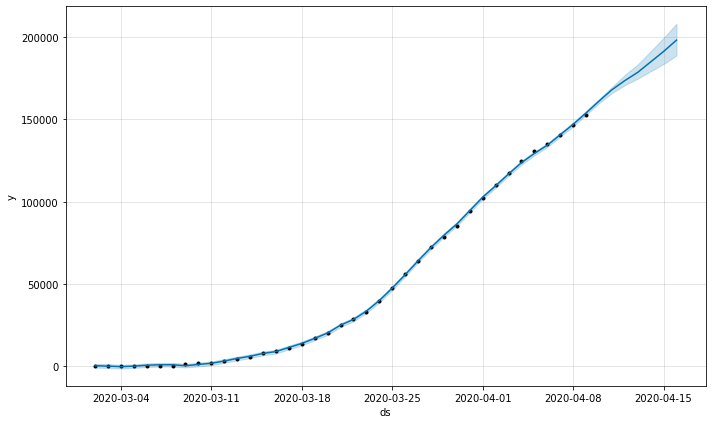

In [128]:
confirmed_forecast_plot = m.plot(forecast)

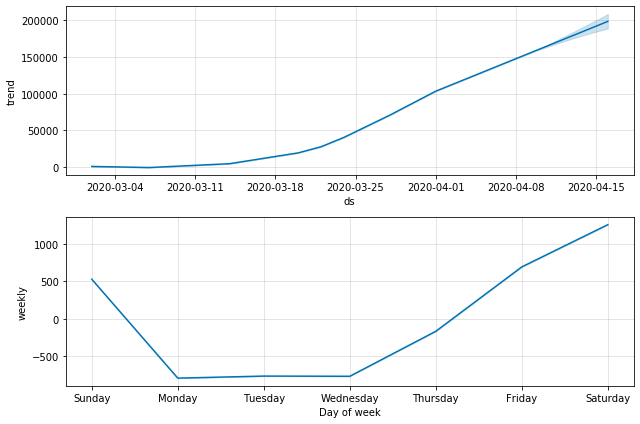

In [129]:
confirmed_forecast_plot =m.plot_components(forecast)

## 6.1 Forecast of the total deaths of cases in Spain(Prophet)

In [141]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [142]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
41,2020-04-12
42,2020-04-13
43,2020-04-14
44,2020-04-15
45,2020-04-16


In [143]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
41,2020-04-12,17767.930430,17433.223880,18108.752432
42,2020-04-13,18455.880296,18001.488915,18916.825885
43,2020-04-14,19220.056998,18584.499510,19890.919175
44,2020-04-15,19991.490701,19146.497124,20872.768170
45,2020-04-16,20786.672904,19717.266571,21796.610866


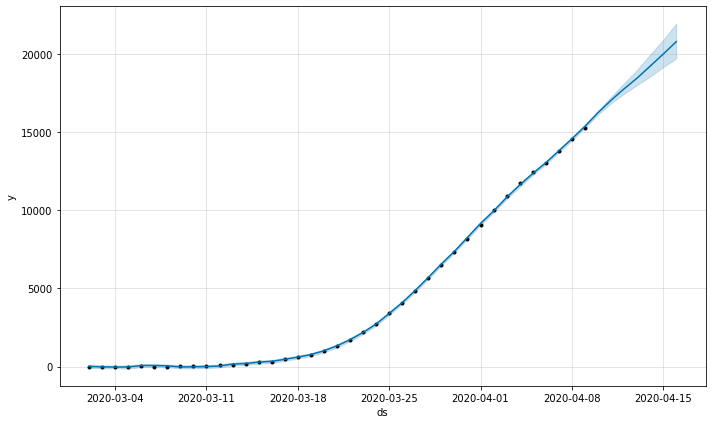

In [134]:
deaths_forecast_plot = m.plot(forecast)

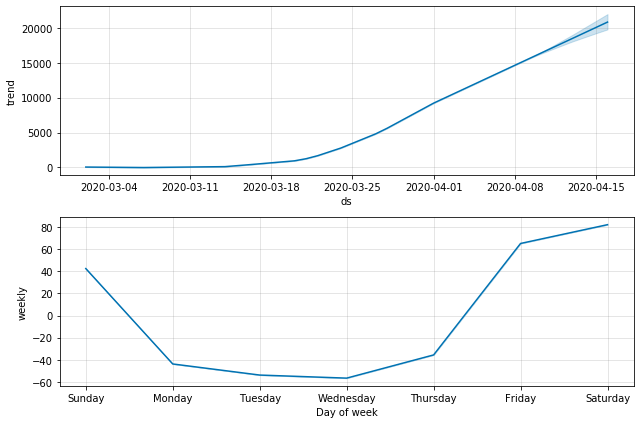

In [135]:
deaths_forecast_plot = m.plot_components(forecast)


## 6.3 Forecast of the total number of cases cured in  Spain(Prophet)

In [136]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [137]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
41,2020-04-12
42,2020-04-13
43,2020-04-14
44,2020-04-15
45,2020-04-16


In [138]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
41,2020-04-12,35774.592203,20102.566451,51747.994639
42,2020-04-13,39506.038707,23312.723790,54203.429598
43,2020-04-14,40456.631108,24275.310056,56055.005152
44,2020-04-15,42088.174115,26972.678847,58176.924881
45,2020-04-16,43738.518482,27829.818486,59644.465683


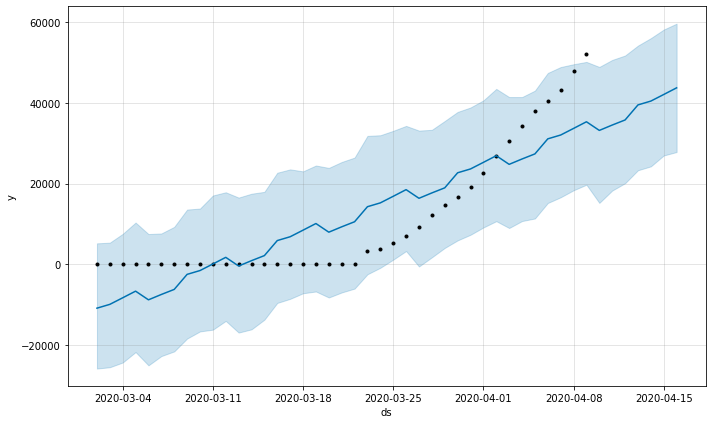

In [139]:
recovered_forecast_plot = m.plot(forecast)

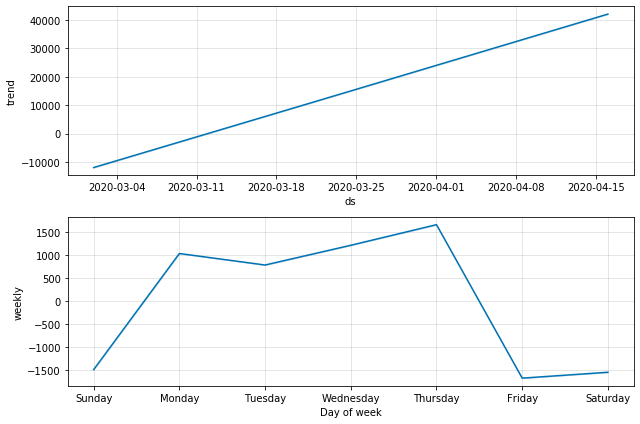

In [140]:
recovered_forecast_plot = m.plot_components(forecast)